## **Business Understanding**

**Project Overview**

PureDrop is a system that helps in water conservation by detecting leakages in water pipes using IoT sensors to alert plumbers on the exact loacation of leakage for quick repair. The system is also used by households to track and monitor water usage. Consumers are given redeemable credits for conservative and efficient water usage.

**Innovation Overview**

PureDrop team wishes to introduce a water potability monitoring tool into the system to ensure consumers get safe water for drinking. The tool will utilize Artificial Intelligence to predict whether the water getting to consumers is safe for drinking or not. 

**Innovation Metric of Success**

The purpose of this section is to develop a fully functioning Machine Learning Model that will be deployed into the backend of PureDrop system. A User Interface will be intergrated whereby the user(water service provider/water treatment officers) can key in water potability check data points and get a feedback of whether the water is safe for drinking or not.

**Recording the Experimental Design**

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings and Recommendation

**Model Training Data Source**

The dataset for ML training purposes was provided by Power Learn Project as it has been considered effective for the objective of our AI tool.


## **Dependancies**

In [27]:
# Data importation
import pandas as pd
import numpy as np

# Data cleaning
from sklearn.impute import SimpleImputer

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Importation**

### **Glossary**

The dataset contains the following features;

**Independent Varables**
* ph (int64)
* Hardness (int64)
* Solids (int64)
* Chloramines (int64)
* Sulfate (int64)
* Conductivity (int64)
* Organic Carbon (int64)
* Trihalomethanes (int64)
* Turbidity (int64)

**Dependent Variable**
* Potability (boolean)




In [2]:
#Load data
df = pd.read_csv('water_potability-raw.csv')

##Preview data
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## **Data Cleaning**

### Baseline Exploration & Cleaning

In [3]:
# Check the records of the data
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 3276 rows and 10 columns


In [4]:
#Shuffle data for better model training

df = df.sample(3276)
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2904,NaN,161.578889,11582.462584,6.720473,NaN,393.837751,11.319488,78.898515,4.374333,0
538,8.394397,187.643411,10603.098021,7.840261,352.835640,376.241146,13.374831,58.950002,2.833901,0
2008,5.756476,171.971804,8086.825999,7.304628,330.133777,442.758756,11.364751,95.898495,4.002082,1
1260,8.522568,208.133000,16446.328050,6.729775,372.503843,346.374598,12.002178,80.758618,3.358284,0
1613,7.240194,154.137579,31144.703124,4.807069,261.213317,451.015838,10.851917,NaN,3.362822,1
243,9.406326,216.762159,27948.589445,6.156111,355.473035,347.983078,16.340715,32.108292,3.097278,0
1078,8.177175,210.448770,18626.149312,7.271672,NaN,455.927500,14.247947,85.930428,3.325639,1
2037,7.493291,216.381880,9465.323905,4.947531,341.460632,501.345347,11.247507,52.951363,3.748747,1
2749,5.913133,184.393156,40847.760146,7.041828,331.959964,563.409970,21.917377,58.839203,3.900211,1
2230,10.391942,262.741770,39116.682706,3.205786,285.728420,473.313969,13.300688,65.318816,5.771715,0


In [5]:
# Check metadata for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 2904 to 1737
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 281.5 KB


In [6]:
# Check missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
#Dropping the missing values will lead to a significant loss of data
#Use simpleImputer algorithm to fill in the missing values with the average of the variable

#Load the imputer and specify to fill null values with mean
imp = SimpleImputer(missing_values= np.nan, strategy='mean')

df['ph'] = imp.fit_transform(df[['ph']])
df['Sulfate'] = imp.fit_transform(df[['Sulfate']])
df['Trihalomethanes'] = imp.fit_transform(df[['Trihalomethanes']])


#Confirm no missing value
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## **Exploratory Data Analysis**

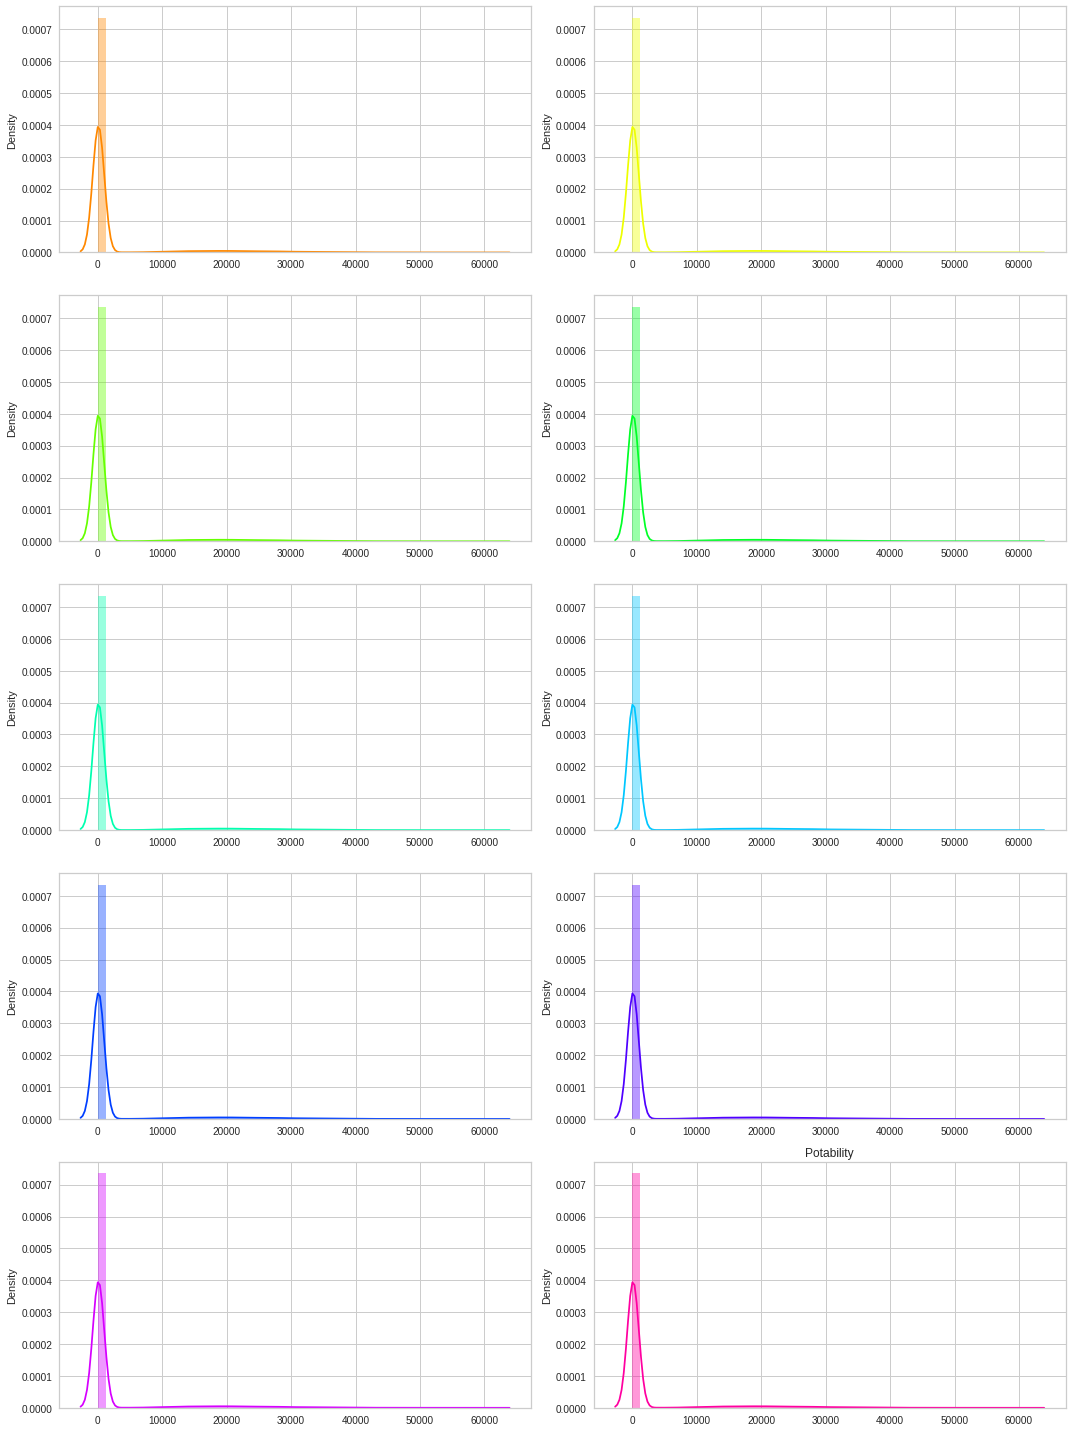

In [32]:
#Kernel Distribution Estimation
# histogram showing the distribution of the continuous variables
num_cols = df.columns.to_list()
num_cols

colors = sns.color_palette("hsv", len(num_cols))
number_rows = round(len(num_cols) / 2)

fig, axes = plt.subplots(nrows = number_rows, ncols = 2, figsize = (15, 20))

for col, color, ax in zip(num_cols, colors, axes.flatten()):
    plt.title(col)
    sns.distplot(df, color = color, ax = ax)
    
    
plt.tight_layout()


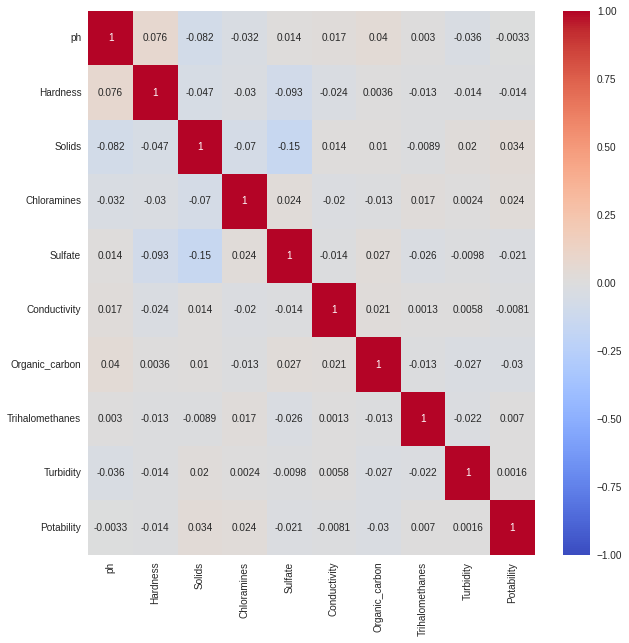

In [33]:
#Checking correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

## Modeling

We shall use an AutoML framework called  **Pycaret ** that will handle best scikit learn model for the provided data, perform feature engineering and hyperparameter tuning

In [12]:
#Install pycaret 2.3 version that will work with flask for deployment purposes
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.7 MB/s eta 0:00:00


In [13]:
#import all artefacts from pycaret classification package 
#since our problem is a classification one
from pycaret.classification import *

#Setup pycaret and specify our output or target variable is Potability
s = setup(df, target = 'Potability')

,Description,Value
0,Session id,5567
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(3276, 10)"
4,Transformed data shape,"(3276, 10)"
5,Transformed train set shape,"(2293, 10)"
6,Transformed test set shape,"(983, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [14]:
#Compare sklearn models to see the best fit for the provided data
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6712,0.6825,0.3452,0.6486,0.4494,0.2455,0.2706,0.0530
rf,Random Forest Classifier,0.6668,0.6813,0.3475,0.6315,0.4463,0.2374,0.2592,0.8770
et,Extra Trees Classifier,0.6594,0.6680,0.3016,0.6323,0.4070,0.2095,0.2377,0.8540
gbc,Gradient Boosting Classifier,0.6516,0.6583,0.2715,0.6190,0.3765,0.1847,0.2144,0.7030
lightgbm,Light Gradient Boosting Machine,0.6332,0.6539,0.3932,0.5415,0.4549,0.1892,0.1949,0.3020
xgboost,Extreme Gradient Boosting,0.6311,0.6472,0.4012,0.5362,0.4580,0.1877,0.1924,0.4940
nb,Naive Bayes,0.6245,0.5908,0.2212,0.5472,0.3141,0.1163,0.1390,0.0870
lr,Logistic Regression,0.6101,0.5013,0.0011,0.1000,0.0022,0.0013,0.0082,0.3470
ridge,Ridge Classifier,0.6101,0.0000,0.0033,0.2333,0.0066,0.0023,0.0152,0.0750
lda,Linear Discriminant Analysis,0.6097,0.4990,0.0033,0.1833,0.0065,0.0015,0.0090,0.0950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [15]:
#Perform hyperparameter tuning to the model
tuned_model = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6957,0.6777,0.4222,0.6786,0.5205,0.3149,0.3339
1,0.6826,0.6868,0.3556,0.6809,0.4672,0.2716,0.3007
2,0.6391,0.6637,0.3333,0.5660,0.4196,0.1824,0.1959
3,0.6550,0.6556,0.3146,0.6087,0.4148,0.2040,0.2263
4,0.6856,0.7063,0.3483,0.6889,0.4627,0.2729,0.3046
5,0.6507,0.6667,0.2584,0.6216,0.3651,0.1773,0.2098
6,0.6856,0.7100,0.3933,0.6604,0.4930,0.2857,0.3059
7,0.6900,0.6949,0.3708,0.6875,0.4818,0.2878,0.3157
8,0.6725,0.6934,0.3778,0.6415,0.4755,0.2599,0.2792


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Observation**

The model has a significant improvement after tuning

In [16]:
#Evsluating the model.
#Click on the tas for details on each evaluation
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
#Test the model 
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.6714,0.6750,0.3473,0.6456,0.4516,0.2462,0.2703


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,prediction_label,prediction_score
2423,7.074252,208.920364,16739.267578,7.861469,333.775787,518.977173,8.881999,78.419022,4.878944,1,0,0.6975
429,6.961892,223.595840,31101.683594,3.692065,343.827271,530.221436,13.675480,70.434959,3.446728,0,1,0.5089
141,7.080794,167.386124,20944.621094,4.963124,333.775787,566.339294,11.318807,66.396294,3.679795,0,0,0.6433
458,8.692116,144.236359,2552.962891,9.202634,347.975128,517.427490,13.963421,42.388660,2.283475,0,0,0.5604
2533,6.768060,179.806000,23793.031250,5.332099,333.198181,461.530457,13.557382,60.571239,4.145807,0,0,0.6308
...,...,...,...,...,...,...,...,...,...,...,...,...
3252,4.868827,258.678955,13400.385742,4.880910,333.775787,328.764526,17.352081,55.968216,3.255600,1,1,0.8213
1451,10.351743,241.671799,18588.302734,8.784378,333.775787,303.688110,13.615948,75.129898,5.227610,0,0,0.7360
52,6.652488,145.010178,19871.789062,4.961066,288.052185,545.974976,10.942024,71.727417,3.742090,0,1,0.5583
2349,5.495976,150.534515,18333.632812,7.471728,416.888519,300.358978,12.300193,55.706779,4.901038,1,1,0.8003


In [ ]:
#Uncomment below and run this cell to save the model
#save_model(best, 'wpp_model')

In [23]:
#New instance to test the model on new incoming data
ph = 7.0
hardness = 215
solids = 12000
chlormines = 7
sulphate = 334
conductivity = 415
organic_carbon = 16
trihalomethanes = 80
turbidity = 3

new = [[ph, hardness, solids, chlormines, 
        sulphate, conductivity, organic_carbon, 
        trihalomethanes, turbidity]]

In [37]:
#Let the model predict the new instance
pred = int(best.predict(new))

if pred == 0:
  print(pred)
  print("\nWater is safe for drinking")
  print('\nModel accuracy: 67.12%')
elif pred == 1:
    print("Water is NOT safe for drinking")
else: print(pred)


0

Water is safe for drinking

Model accuracy: 67.12%
